Supermart Grocery Sales- Retail Analytics Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')
df.shape 

In [10]:
df.head(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [12]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [13]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [17]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True, errors="coerce")
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,month_no,Month,year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11.0,November,2017.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11.0,November,2017.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6.0,June,2017.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10.0,October,2016.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10.0,October,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,NaT,West,945,0.16,359.10,Tamil Nadu,NaN,NaN,NaN
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Tamil Nadu,7.0,July,2015.0
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu,6.0,June,2017.0
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,NaT,West,1659,0.15,597.24,Tamil Nadu,NaN,NaN,NaN


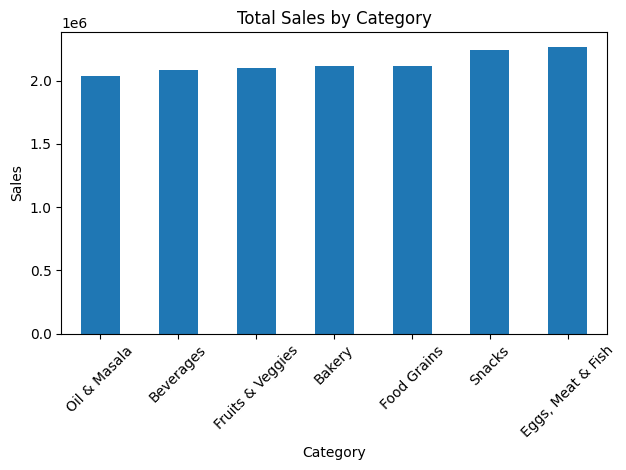

In [18]:
#Total sales by category
sales_by_cat = df.groupby('Category')['Sales'].sum().sort_values()
sales_by_cat.plot(kind='bar')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

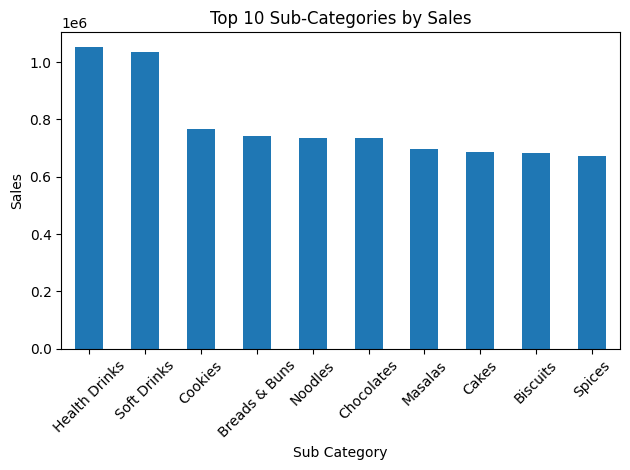

In [19]:
# Top 10 sub‑categories by sales
sales_by_sub = df.groupby('Sub Category')['Sales'].sum().sort_values(ascending=False).head(10)
sales_by_sub.plot(kind='bar')
plt.title('Top 10 Sub-Categories by Sales')
plt.xlabel('Sub Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

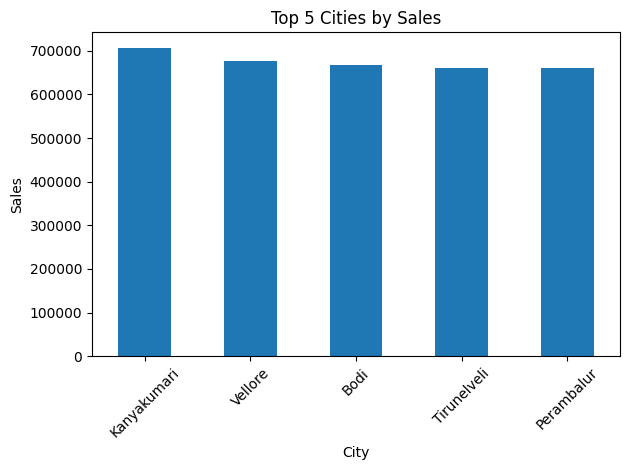

In [20]:
#Top 5 cities by Sales
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)
city_sales.plot(kind='bar')
plt.title('Top 5 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

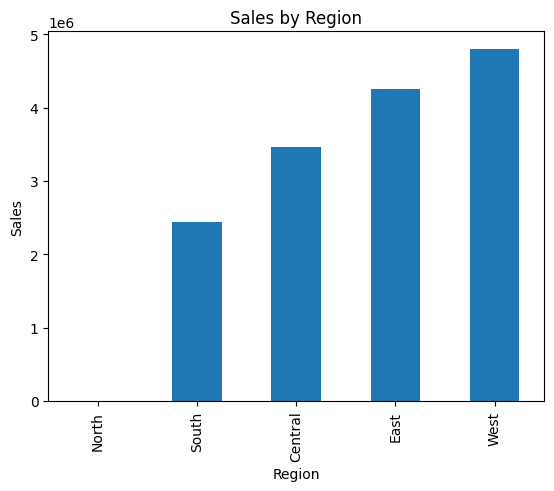

In [21]:
#Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values()
region_sales.plot(kind='bar')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

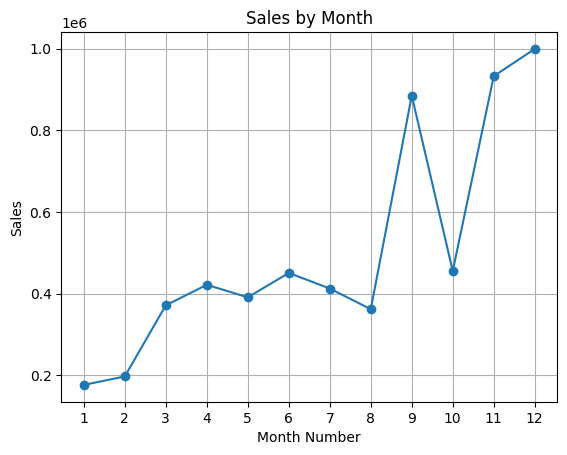

In [22]:
#Time Based Analysis
monthly_sales = df.groupby('month_no')['Sales'].sum().reset_index().sort_values('month_no')

plt.plot(monthly_sales['month_no'], monthly_sales['Sales'], marker='o')
plt.title('Sales by Month')
plt.xlabel('Month Number')
plt.ylabel('Sales')
plt.xticks(monthly_sales['month_no'])
plt.grid(True)
plt.show()

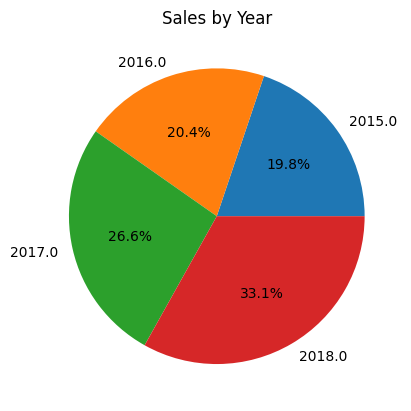

In [23]:
#Yearly Sales
yearly_sales = df.groupby('year')['Sales'].sum()

plt.pie(yearly_sales, labels=yearly_sales.index, autopct='%1.1f%%')
plt.title('Sales by Year')
plt.show()


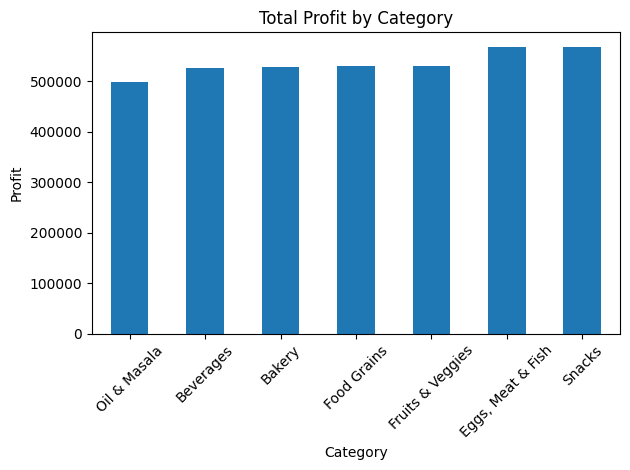

In [24]:
#Profit and Discount Analysis
profit_by_cat = df.groupby('Category')['Profit'].sum().sort_values()
profit_by_cat.plot(kind='bar')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


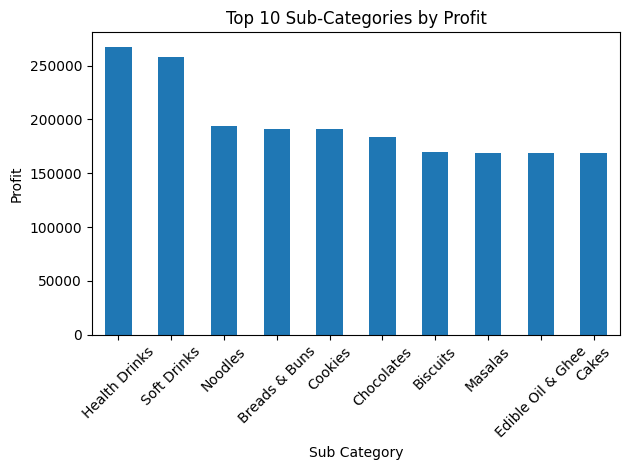

In [25]:
#Top 10 Sub-categories by profit
profit_by_sub = df.groupby('Sub Category')['Profit'].sum().sort_values(ascending=False).head(10)
profit_by_sub.plot(kind='bar')
plt.title('Top 10 Sub-Categories by Profit')
plt.xlabel('Sub Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

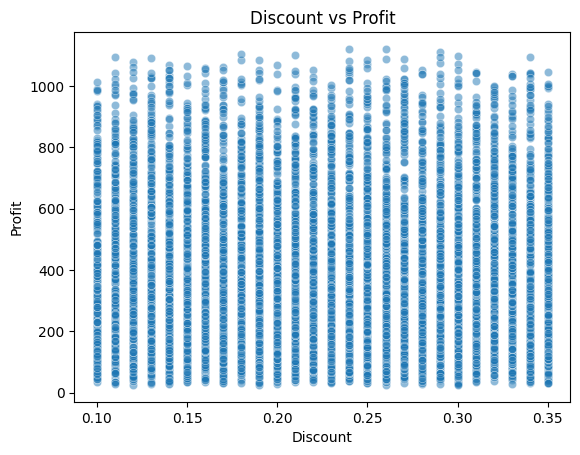

In [26]:
#Discount vs profit scatter
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.5)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

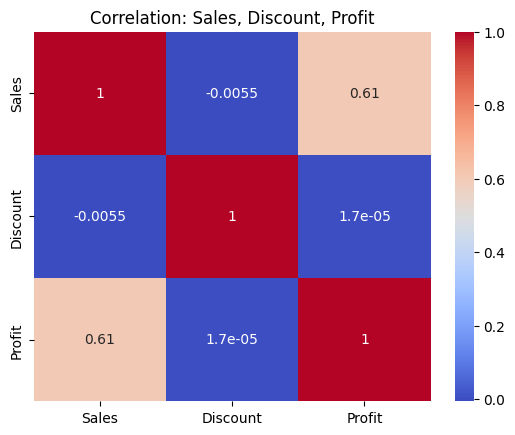

In [27]:
#Correlation heatmap
corr = df[['Sales', 'Discount', 'Profit']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation: Sales, Discount, Profit')
plt.show()